# 1. Développement d'un jeu

In [283]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt

In [284]:
# configuration
GAMMA = 0.96
ALPHA = 0.81

##### Créer une fonction qui permet de simuler le plateau en positionnant notamment les différents éléments (case départ, fin, dragons).

In [285]:
#for the space
"""
by default the default space is used
the space is a 2D array 4 * 4 of characters
the characters are: 
    'S' : the starting point
    '_' : empty space
    'J' : the goal
    'D' : a dragon
the default space is:
    S___
    D_D_ 
    ___D
    _D_J
"""

# the default space
default_space = [
        # ['S', '_', '_', '_'],
        # ['D', '_', 'D', '_'],
        # ['_', '_', '_', 'D'],
        # ['_', 'D', '_', 'J']

        ['S',  '_'],
        ['D',  'J']
    ]

def get_default_space():
    return default_space

# a random space with number of lines and columns and a number of dragons
def get_random_space(lines, columns, dragons):
    space = []
    for l in range(lines):
        space.append([])
        for c in range(columns):
            space[l].append('_')

    space[0][0] = 'S'
    space[lines-1][columns-1] = 'J'
    
    i = 0
    while i < dragons:
        l = random.randint(0, lines-1)
        c = random.randint(0, columns-1)
        if space[l][c] == '_':
            space[l][c] = 'D'
            i += 1
        else:
            i -= 1

    return space

# pretty print the space
def print_space(space):
    for l in space:
        for c in l:
            print(c, end='| ')
        
        print()

# get the size of the lines
def get_lines_size(space):
    return len(space)

# get the size of the columns
def get_columns_size(space):
    return len(space[0])

# get the size of the space
def get_size(space):
    return get_lines_size(space) * get_columns_size(space)
    

In [286]:
# a static class for the rewards
class Rewards:
    # the rewards for each character
    rewards = {
        'S': 0,
        '_': 0,
        'J': 1,
        'D': -1
    }

    # a method to get the reward of a character
    def get_reward(character):
        return Rewards.rewards.get(character)

    # a method to set the reward 
    def set_rewards(rewards):
        Rewards.rewards = rewards

    # a method to set the reward of a character
    def set_reward(character, reward):
        Rewards.rewards[character] = reward

##### Créer une fonction qui permet de simuler l'interaction entre l'agent et son environnement.

In [287]:
# a static class for the Directions
class Directions:
    # the directions
    directions = ["HAUT", "DROITE", "BAS", "GAUCHE"]

    # a method to get the size of the directions
    def get_size():
        return len(Directions.directions)

    # a method to get the index of a direction
    def get_index(direction):
        return Directions.directions.index(direction)

    # a method to get a random direction
    def get_random_direction():
        return random.choice(Directions.directions)

    # a method to get the direction that maximizes the Q value
    def get_max_direction(mat_q, state):
        return Directions.directions[np.argmax(mat_q[state])]

In [288]:
def isFin (space, position, verbose = False):
    (l,c) = position

    # if the player is at the goal, back to the starting point
    if(space[l][c]== 'J'):
        # print in green win
        if verbose:
            print("\033[92m" + 
            "*************************************************************************************\n" +
            "*********************************** YOU WIN *****************************************\n" +
            "*************************************************************************************\n" +
            "\033[0m")
        return True, (0,0)

    # # if the player ecnounters a dragon, back to the starting point
    if(space[l][c]== 'D'):
        # print in red loose
        if verbose:
            print("\033[91m" +
            "*********************************** YOU LOOSE ****************************************\n" +
            "\033[0m")
        return True, (0,0)

    return False, position

# a method to apply an action to the player
# returns [position, reward, fin]
def applicaion_action(action, position, space, verbose = False):

    # reward -1 every time
    reward = -1

    (l, c) = position
    nextPos = position

    if action == "HAUT":
        nextPos = (l-1,c)
    elif action == "DROITE":
        nextPos = (l,c+1)
    elif action == "BAS":
        nextPos = (l+1,c);
    elif action == "GAUCHE":
        nextPos = (l,c-1);

    # check if the next position is in the space
    if (nextPos[0] < len(space) and nextPos[1] < len(space) and nextPos[0] >=0 and nextPos[1] >=0 ):
        position = nextPos
        # get the current case in the space
        case = space[position[0]][position[1]]
        # set the reward
        reward += Rewards.get_reward(case)

    # check if the player is at the goal
    fin, position = isFin(space, position, verbose)

    return [position, reward, fin]

### Donner quelques éléments de commentaire sur la mise en place de l'environnement de jeux


##### 1) Le plateau

Pour créer un environnement de jeux, nous avons d'abord créé une la variable ***default_space*** qui est un tableau 2 dimensions **(4*4)** de charactères qui representent les cases du plateau de jeu proposé. Les cases sont représentées par les caractères suivants:

*   ***"_"*** représente une case vide
*   ***"D"*** représente une case avec un dragon
*   ***"S"*** représente la case de départ
*   ***"J"*** représente la case d'arrivée (JAIL)


Nous avons aussi créé une fonction ***get_random_space*** qui permet de générer un plateau de jeu aléatoire en precisant le nombre de lignes, de colonnes etle nombre de dragons à placer sur le plateau.

Nous avons aussi créé une fonction ***print_space*** qui permet d'afficher le plateau de jeu.

##### 2) L'interaction





# 2. Développement du Q-learning

In [289]:
# for the Q matrix
# init the Q matrix with zeros and the size of the space and the directions length
def init_mat_q(space):
    return np.zeros((get_lines_size(space), get_columns_size(space), Directions.get_size()))

# get the Q value of a state and a direction
def get_q_value(mat_q, state, direction):
    return mat_q[state][Directions.get_index(direction)]

# update the Q matrix
# according to state, action, reward, next_state, ALPHA and GAMMA
def update_mat_q(mat_q, state, action, reward, next_state):
    mat_q[state][Directions.get_index(action)] += ALPHA * (reward + GAMMA * np.max(mat_q[next_state]) - mat_q[state][Directions.get_index(action)])
    return mat_q

# pretty print the space
def print_mat_q(mat_q, space):
    def get_best_direction(l, c):
        return Directions.directions[np.argmax(mat_q[l][c])]

    for l in range(get_lines_size(space)):
        for c in range(get_columns_size(space)):
            case      = space[l][c]
            direction = get_best_direction(l, c)
            q_value   = str(round(get_q_value(mat_q, (l, c), direction), 2)).ljust(6)

            content = case + " (" + q_value + ") " + direction
            print(content.ljust(20), end='| ')
        print("\n_______________________________________________________________________________________")

In [290]:
# a class for the game
class Game:
    # constructor that takes :
    # number of episodes : 10000 by default
    # number of steps : 100 by default
    # is_random_space : False by default
    # a Q matrix : initialized with zeros (with the size of the space and the number of directions)
    def __init__(self, episodes = 10000, steps = 100, is_random_space = False, mat_q = None):
        self.episodes = episodes
        self.steps = steps
        # the space
        if is_random_space:
            self.space = get_random_space(4, 4, 3)
        else:
            self.space = get_default_space()
        
        # the Q matrix 
        if mat_q is None:
            self.mat_q = init_mat_q(self.space)

    # a method to choose an action with the epsilon greedy policy
    def choose_action(self, state, epsilon, mat_q):
        if random.random() < epsilon:
            return Directions.get_random_direction()
        else:
            return Directions.get_max_direction(mat_q, state)

    # a method to play one step (with mat_q, state, epsilon)
    def oneStep(self, mat_q, state, epsilon, verbose):
        # choose an action
        action = self.choose_action(state, epsilon, mat_q)
        if verbose:
            print(action, end=', ')
        # apply the action
        new_state, reward, fin = applicaion_action(action, state, self.space)
        # update the Q matrix
        new_q = update_mat_q(mat_q, state, action, reward, new_state)
        return new_q, new_state, fin


In [291]:
# PLAY
game = Game()

total_steps = 0

# apply the algorithm 
for episode in range(game.episodes):
    # reset the position
    position = (0, 0)
    # calculate the epsilon
    epsilon = game.episodes / (game.episodes + episode)
    #print("epsilon : ", epsilon)

    # play the game
    for step in range(1, game.steps):
        # play one step
        game.mat_q, position, fin = game.oneStep(game.mat_q, position, epsilon, False)
        # if the game is finished
        if fin:
            total_steps += step
            break

print("total steps : ", total_steps)
print("average steps : ", total_steps / game.episodes)

print(game.mat_q)

total steps :  33056
average steps :  3.3056
[[[-13.24489796 -12.75510204 -14.24489796 -13.24489796]
  [-12.75510204 -12.75510204 -12.24489796 -13.24489796]]

 [[  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]]]


In [292]:
# play a with the optimal policy
for step in range(1, game.steps):
    # play one step
    game.mat_q, position, fin = game.oneStep(game.mat_q, position, 0, True)
    if fin:
        print("fin de partie en", step, "coups")
        break

DROITE, BAS, fin de partie en 2 coups


In [293]:
print_mat_q(game.mat_q, game.space)

S (-12.76) DROITE   | _ (-12.24) BAS      | 
_______________________________________________________________________________________
D (0.0   ) HAUT     | J (0.0   ) HAUT     | 
_______________________________________________________________________________________


# Deep Q-Learning

In [294]:
# IMPORTS
import tensorflow as tf
import sys

##### Test avec une structure 2 couches denses ayant 16 entrées (nombre de cases) et 4 sorties (4 actions)


In [295]:
# a class for the game
class DeepGame:
    # constructor that takes :
    # number of episodes : 10000 by default
    # number of steps : 100 by default
    # is_random_space : False by default
    # vec_etat : vector of states (for deep Q learning)
    # a model : CNN
    # the optimizer name
    # the loss function name
    # verbose : False by default
    def __init__(
        self, 
        episodes = 10000, 
        steps = 100, 
        is_random_space = False, 
        vec_etat = None, 
        model = None,
        optimizer_name = None,
        loss_fn_name = None,
        verbose = False
        ):

        self.episodes = episodes
        self.steps = steps
        self.vec_etat = vec_etat
        self.model = model
        self.optimizer_name = optimizer_name
        self.loss_fn_name = loss_fn_name
        self.verbose = verbose

        # the space
        if is_random_space:
            self.space = get_random_space(4, 4, 3)
        else:
            self.space = get_default_space()

        # the vector of states
        if vec_etat is None:
            self.set_default_vec_etat()

        # the model
        if model is None:
            self.set_default_model()

        # the optimizer
        self.set_optimizer(optimizer_name)

        # the loss function
        self.set_loss_fn(loss_fn_name)



    # a method to set the vector of states
    def set_vec_etat(self, vec_etat):
        self.vec_etat = vec_etat

    # a method to set the default vector of states
    def set_default_vec_etat(self):
        self.vec_etat = np.zeros((1, 16))
        self.vec_etat[0][0] = 1

    # a method to reset the vector of states
    def reset_vec_etat(self):
        self.vec_etat = np.zeros((1, 16))

    # a method to update the vector of states
    def update_vec_etat(self, state):
        self.reset_vec_etat()
        self.vec_etat[0, int(get_lines_size(self.space) * state[0] + state[1])] = 1

    # a method to set the model
    def set_model(self, model):
        self.model = model

    # a method to set the default model
    def set_default_model(self):
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(4, activation='relu', input_shape=[16]),
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(4),
        ])

    # a method to save the model
    def save_model(self):

        # number of epochs
        E = "E_" + str(self.episodes)
        # number of steps
        S = "_S_" + str(self.steps)
        # optimizer
        O = "_O_" + str(self.optimizer_name)
        # loss function
        L = "_L_" + str(self.loss_fn_name)
        # dragon reward
        DR = "_DR_" + str(Rewards.rewards["D"])
        # empty reward
        ER = "_ER_" + str(Rewards.rewards["_"])
        # jail reward
        JR = "_JR_" + str(Rewards.rewards["J"])

        # file path
        path = "./seved_models/" + E + S + O + L + DR + ER + JR + ".h5"

        self.model.save(path)

    # a method to set the optimizer
    # optimizer : Nadam by default, SGD,Adam
    def set_optimizer(self, optimizer):
        # set the optimizer according to the name 
        if optimizer == "Adam":
            self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        elif optimizer == "SGD":
            self.optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
        else:
            self.optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

    # a method to set the loss function
    # loss_fn : MSE by default, MAE
    def set_loss_fn(self, loss_fn):
        # set the loss function according to the name
        if loss_fn == "MAE":
            self.loss_fn = tf.keras.losses.MAE
        else:
            self.loss_fn = tf.keras.losses.MSE

    # function to print if verbose
    def print(self, *args):
        if self.verbose:
            print(*args)

    # a method to show progress
    def show_progress(self, episode, step, is_random, action, current_case, reward, next_Q_max, target):

        if is_random:
            choise = "  (random)  "
        else:
            choise = "  (predict) "

        self.print(
            "episode : " + str(episode).ljust(5) +
            "| step : " + str(step).ljust(5) +
            "| action : " + str(action).ljust(7) + choise +
            "| current_case : " + str(current_case).ljust(3) +
            "| reward : " + str(reward).ljust(5) +
            "| next_Q_max : " + str(next_Q_max).ljust(15) +
            "| target : " + str(target).ljust(15)
        )
        

    #####################################################################################################################


    # a method to choose an action with the epsilon greedy policy
    def choose_action(self, state, epsilon):
        is_random = random.random() < epsilon
        if is_random:
            action = Directions.get_random_direction()

        else:
            Sortie_Q = self.model(self.vec_etat)  # En entrée le vecteur symbolisant l'état
            action = Directions.directions[np.argmax(Sortie_Q)] #On sélectionne l'action associée avec la sortie max
        return action, is_random
     
    # Train the model
    def train(self):
        # create a stable model
        model_stable = tf.keras.models.clone_model(self.model)
        model_stable.set_weights(self.model.get_weights())

        history = np.zeros(self.episodes)

        for episode in range(self.episodes):
            # reset the position
            position = (0, 0)
            # calculate the epsilon
            epsilon = self.episodes / (self.episodes + episode)

            for step in range(self.steps):
                # play one step
                # choose an action
                action, is_random = self.choose_action(position, epsilon)
                # apply the action
                new_position, reward, fin = applicaion_action(action, position, self.space, self.verbose)
  
                if fin:
                    break

                # set weights of the stable model
                if step % 10 == 0:
                    model_stable.set_weights(self.model.get_weights())

                vec_etat_next = np.zeros((1, 16)) # ca sera l'entree du reseau
                vec_etat_next[0, int(get_lines_size(self.space) * new_position[0] + new_position[1])] = 1

                # model stable predict
                next_Q = model_stable.predict(vec_etat_next, verbose=0)
                next_Q_max = np.max(next_Q)

                # target
                target = reward + GAMMA * next_Q_max * (1 - fin)
                self.show_progress(episode, step, is_random, action, self.space[position[0]][position[1]], reward, next_Q_max, target)

                # gradient descent
                with tf.GradientTape() as tape:
                    predict = self.model(self.vec_etat) # ce que l'on pense obtenir
                    # get index of the action
                    action_index = Directions.get_index(action)
                    mask = tf.one_hot(action_index, Directions.get_size())
                    val_predict = tf.reduce_sum(predict * mask, axis=1)
                    loss = self.loss_fn(target, val_predict)

                gradients = tape.gradient(loss, self.model.trainable_variables) #calcul du gradient de la focntion loss en fonction des variables du modèle 
                self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables)) # optimisation des paramètres du modèle
                history[episode] = loss.numpy() # on récupère la valeur pour afficher l'évolution de l'erreur

                # update the position
                position = new_position

        plt.plot(history, color="red")
        plt.title("Evolution de l'erreur")
        plt.show()

        # save the model
        self.save_model()

    # play the game
    def play(self):

        iter = 0
        position = (0, 0)
        fin = False

        while iter < self.steps and not fin:
            iter += 1
            # update the vector of states
            self.update_vec_etat(position)
            # choose an action
            action, _ = self.choose_action(position, 0)
            # apply the action
            new_position, reward, fin = applicaion_action(action, position, self.space)

            print( str(position) + " " + str(action) + " " + str(new_position))
            if iter % 10 == 0:
                print()
            
            if fin:
                print("fin de partie en", iter, "coups")
                break
            # update the position
            position = new_position

        if iter == self.steps:
            print("Trop d'itérations")



In [296]:
# function to create a game with a configuration train and play
def create_game(optimizer_name, loss_fn_name, episodes, steps, dragon_reward, jail_reward, empty_reward, start_reward=-5, verbose=False):
    # set the rewards
    Rewards.set_rewards({"S": start_reward, "D": dragon_reward, "J": jail_reward, "_": empty_reward})
    # create the game
    game = DeepGame(episodes=episodes, steps=steps, optimizer_name=optimizer_name, loss_fn_name=loss_fn_name, verbose=verbose)

    game.train()
    game.play()

    return game

#### TEST


*   ***optimizer*** : Adam
*   ***loss function*** : SGD
*   ***epochs*** : 1000
*   ***steps*** : 100
*   ***Reward Dragon*** : -500
*   ***Reward Empty*** : -20
*   ***Reward Jail*** : 500



*********************************** YOU LOOSE ****************************************

episode : 1    | step : 0    | action : GAUCHE   (random)  | current_case : S  | reward : -1   | next_Q_max : 0.13109839     | target : -0.8741455459594727
episode : 1    | step : 1    | action : HAUT     (random)  | current_case : S  | reward : -1   | next_Q_max : 0.13109839     | target : -0.8741455459594727
*********************************** YOU LOOSE ****************************************

episode : 2    | step : 0    | action : DROITE   (random)  | current_case : S  | reward : -21  | next_Q_max : 0.16255789     | target : -20.843944430351257
episode : 2    | step : 1    | action : HAUT     (random)  | current_case : _  | reward : -1   | next_Q_max : 0.16255789     | target : -0.8439444303512573
episode : 2    | step : 2    | action : HAUT     (random)  | current_case : _  | reward : -1   | next_Q_max : 0.16255789     | target : -0.8439444303512573
********************************************

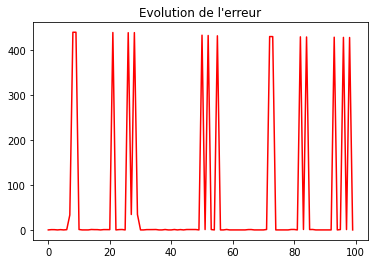

(0, 0) BAS (0, 0)
fin de partie en 1 coups


In [297]:
game1 = create_game(optimizer_name="Adam", loss_fn_name="SGD", episodes=100, steps=100, dragon_reward=-500, empty_reward=-20, jail_reward=500, verbose=True)

#### TEST


*   ***optimizer*** : Nadam
*   ***loss function*** : MSE
*   ***epochs*** : 5000
*   ***steps*** : 100
*   ***Reward Dragon*** : -100
*   ***Reward Empty*** : -10
*   ***Reward Jail*** : 1000



In [298]:
#game2 = create_game(optimizer_name="Nadam", loss_fn_name="MSE", episodes=5000, steps=100, dragon_reward=-100, empty_reward=-10, jail_reward=1000)